Set the context, environment and features

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('Processed_Data.csv')

In [3]:
df

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,number_of_words,stopwords_frequency,av_word_per_sen,...,ttr,coherence_score,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity
0,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,0.498084,14.500000,...,0.099639,0.422997,0.245068,0.275570,0.203065,0.065134,0.111111,0.377358,0.317073,0.119650
1,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0.581614,38.071429,...,0.055175,0.506789,0.398650,0.397796,0.200750,0.061914,0.103189,0.373832,0.296875,0.110981
2,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,0.515625,16.842105,...,0.073317,0.472376,0.699098,0.433225,0.221875,0.043750,0.090625,0.380282,0.277778,0.105634
3,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,0.559066,20.222222,...,0.055877,0.412691,0.629558,0.498259,0.188187,0.043956,0.119505,0.569343,0.184466,0.105024
4,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,0.521368,78.000000,...,0.085833,0.551796,0.110281,0.096727,0.230769,0.034188,0.119658,0.481481,0.150000,0.072222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,0.430168,29.833333,...,0.110204,0.593374,0.062313,0.044963,0.329609,0.072626,0.100559,0.186441,0.315789,0.058876
3907,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,0.526882,29.062500,...,0.067620,0.325690,0.327018,0.124590,0.273118,0.032258,0.030108,0.370079,0.301887,0.111722
3908,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,0.525292,32.125000,...,0.089931,0.383324,0.388689,0.460645,0.214008,0.031128,0.120623,0.454545,0.777778,0.353535
3909,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,0.527451,24.285714,...,0.064596,0.444652,0.510104,0.471795,0.223529,0.027451,0.113725,0.526316,0.638889,0.336257


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
selected_features = pd.concat([df.iloc[:,7:], df['cohesion'], df['vocabulary']], axis = 1)
train_data, test_data = train_test_split(selected_features, test_size= 0.2,  random_state = 2)

In [7]:
test_data.shape

(783, 38)

In [9]:
train_data

,number_of_words,stopwords_frequency,av_word_per_sen,punctuations,ARI,freq_of_verb,freq_of_adj,freq_of_adv,freq_of_distinct_adj,freq_of_distinct_adv,...,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity,cohesion,vocabulary
1749,389,0.437018,14.961538,0.075650,6,0.089974,0.105398,0.010283,0.071979,0.007712,...,0.583806,0.545659,0.316195,0.046272,0.095116,0.333333,0.114286,0.038095,3.5,4.0
2304,320,0.440625,21.333333,0.084270,9,0.140625,0.056250,0.065625,0.050000,0.021875,...,0.518039,0.277898,0.303125,0.031250,0.081250,0.185567,0.466667,0.086598,3.0,2.0
2458,228,0.368421,15.200000,0.061728,6,0.109649,0.122807,0.078947,0.052632,0.048246,...,0.713681,0.509217,0.250000,0.008772,0.065789,0.491228,0.720000,0.353684,3.5,3.5
1383,457,0.509847,19.869565,0.060241,8,0.098468,0.098468,0.028446,0.056893,0.019694,...,0.578532,0.800124,0.216630,0.050328,0.113786,0.454545,0.288889,0.131313,4.0,4.5
1354,455,0.595604,75.833333,0.042194,34,0.079121,0.090110,0.039560,0.065934,0.021978,...,0.287504,0.148577,0.219780,0.057143,0.142857,0.410000,0.500000,0.205000,2.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,277,0.487365,11.080000,0.082508,4,0.068592,0.072202,0.061372,0.061372,0.046931,...,0.559748,0.224948,0.277978,0.039711,0.126354,0.259740,0.894737,0.232399,3.5,3.5
1608,283,0.551237,28.300000,0.080645,12,0.102473,0.084806,0.067138,0.077739,0.021201,...,0.249115,0.261299,0.197880,0.042403,0.098940,0.428571,0.655172,0.280788,3.5,3.0
2541,305,0.419672,12.200000,0.130790,6,0.121311,0.118033,0.068852,0.055738,0.026230,...,0.532533,0.448009,0.242623,0.049180,0.075410,0.486486,0.567568,0.276114,2.5,3.0
2575,847,0.521842,29.206897,0.057650,13,0.120425,0.064935,0.029516,0.049587,0.010626,...,0.704079,0.609323,0.251476,0.061393,0.112161,0.258216,0.245098,0.063288,3.5,3.0


In [8]:
feature_columns = []
coherence_score = tf.feature_column.numeric_column("coherence_score")
feature_columns.append(coherence_score)
ttr = tf.feature_column.numeric_column("ttr")
feature_columns.append(ttr)
freq_diff_words = tf.feature_column.numeric_column("freq_diff_words")
feature_columns.append(freq_diff_words)
number_of_diff_words = tf.feature_column.numeric_column("number_of_diff_words")
feature_columns.append(number_of_diff_words)
dale = tf.feature_column.numeric_column("dale_chall_readability_score")
feature_columns.append(dale)
mcalpine_eflaw = tf.feature_column.numeric_column("mcalpine_eflaw")
feature_columns.append(mcalpine_eflaw)
ts = tf.feature_column.numeric_column("text_standard")
feature_columns.append(ts)

fle = tf.feature_column.numeric_column("flesch_kincaid_grade")
feature_columns.append(fle)
disadv = tf.feature_column.numeric_column("freq_of_distinct_adv")
feature_columns.append(disadv)
disadj = tf.feature_column.numeric_column("freq_of_distinct_adj")
feature_columns.append(disadj)
feature_columns.append(tf.feature_column.numeric_column("freq_of_adv"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_adj"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_verb"))
feature_columns.append(tf.feature_column.numeric_column("ARI"))
feature_columns.append(tf.feature_column.numeric_column("punctuations"))
feature_columns.append(tf.feature_column.numeric_column("av_word_per_sen"))
feature_columns.append(tf.feature_column.numeric_column("stopwords_frequency"))
feature_columns.append(tf.feature_column.numeric_column("number_of_words"))
feature_columns.append(tf.feature_column.numeric_column("flesch_reading_ease"))
feature_columns.append(tf.feature_column.numeric_column("Incorrect_form_ratio"))
feature_columns.append(tf.feature_column.numeric_column("num_of_short_forms"))
feature_columns.append(tf.feature_column.numeric_column("num_of_grammar_errors"))
feature_columns.append(tf.feature_column.numeric_column("sentiment_negative"))
feature_columns.append(tf.feature_column.numeric_column("sentiment_positive"))
feature_columns.append(tf.feature_column.numeric_column("sentiment_compound"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_wrong_words"))
feature_columns.append(tf.feature_column.numeric_column("sentence_complexity"))
feature_columns.append(tf.feature_column.numeric_column("lexrank_avg_min_diff"))
feature_columns.append(tf.feature_column.numeric_column("lexrank_interquartile"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_noun"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_transition"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_pronoun"))
feature_columns.append(tf.feature_column.numeric_column("noun_to_adj"))
feature_columns.append(tf.feature_column.numeric_column("verb_to_adv"))
feature_columns.append(tf.feature_column.numeric_column("phrase_diversity"))











my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_columns.append(tf.feature_column.numeric_column("vocabulary"))
my_new_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


In [9]:
len(feature_columns)

36

In [10]:
def plot_the_loss_curve(mse_train, mse_val):
  """Plot a curve of loss vs. epoch."""

  plt.figure(figsize=(10, 8))
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(mse_train, label="Training Loss")
  plt.plot(mse_val, label="Validation Loss")
  plt.legend()
  # plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

In [11]:
def create_model_linear(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""

  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(30, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=1))
  

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error", 
                metrics=[tf.keras.metrics.MeanSquaredError(), "accuracy"])
  return model           

In [12]:
def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, validation_split=0.2, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  mse_train = history.history['loss']
  mse_val = history.history['val_loss']

  return mse_train, mse_val

Train on vocabulary

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30


 1/10 [==>...........................] - ETA: 12s - loss: 223.6973 - mean_squared_error: 223.6973 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 75ms/step - loss: 9875.6846 - mean_squared_error: 9875.6846 - accuracy: 0.0000e+00 - val_loss: 3.3110 - val_mean_squared_error: 3.3110 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 8.2785 - mean_squared_error: 8.2785 - accuracy: 0.0000e+00 - val_loss: 151.1998 - val_mean_squared_error: 151.1998 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 236.5699 - mean_squared_error: 236.5699 - accuracy: 0.0000e+00 - val_loss: 205.3056 - val_mean_squared_error: 205.3056 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 257.6559 - mean_squared_error: 257.6559 - accuracy: 0.0000e+00 - val_loss: 412.3067 - val_mean_squared_error: 412.3067 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 177.7565 - mean_squared_error: 177.7565 - accuracy: 0.0000e+00 - val

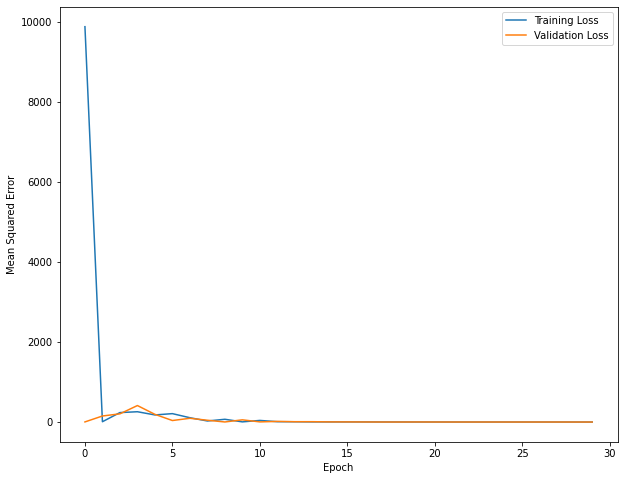

In [13]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "vocabulary"

# Establish the model's topography.
model_lr = create_model_linear(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
mse_train_lr, mse_val_lr = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_lr, mse_val_lr)

In [15]:
label2 = "cohesion"
test_data.pop("corrected_text")
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop(label2)
test_label = np.array(test_features.pop(label_name))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result = model_lr.evaluate(x=test_features, y=test_label, batch_size=batch_size)

for item in zip(model_lr.metrics_names, result):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 5ms/step - loss: 0.4978 - mean_squared_error: 0.4978 - accuracy: 0.0026
loss 0.4978398382663727
mean_squared_error 0.4978398382663727
accuracy 0.0025542783550918102


In [16]:
prediction = model_lr.predict(test_features)
prediction

25/25 [==============================] - 0s 3ms/step


array([[3.087934 ],
       [2.3907206],
       [2.5340405],
       [2.7715821],
       [3.2123504],
       [2.637723 ],
       [2.3865767],
       [2.5760376],
       [2.61243  ],
       [3.1120706],
       [2.7342293],
       [2.6894577],
       [2.621704 ],
       [2.7279654],
       [2.5878487],
       [2.5921931],
       [2.6760137],
       [3.1607332],
       [2.5346415],
       [2.1126435],
       [5.262104 ],
       [2.7177455],
       [3.1121163],
       [2.7018511],
       [2.7561045],
       [2.5704627],
       [2.9105508],
       [2.7058897],
       [2.9268079],
       [2.892447 ],
       [2.6343315],
       [2.5326185],
       [2.8605757],
       [3.3883715],
       [2.7959654],
       [3.0047917],
       [2.5082111],
       [3.445657 ],
       [2.8015785],
       [2.5148356],
       [2.8584542],
       [2.5306435],
       [2.840991 ],
       [3.05191  ],
       [2.3350542],
       [2.7909112],
       [2.6749847],
       [2.8465385],
       [2.7454715],
       [2.5800307],


Calculate vocabulary prediction accuracy

In [17]:
pre_list = []
for value in prediction:
  pre_list.append(value[0])

In [18]:
def accuracy_range(Ytrue, Ypred):
    accurate_range=0
    for i in range(len(Ytrue)):
        if abs(Ytrue[i] - Ypred[i])<=0.5:
            accurate_range+=1
    return accurate_range/len(Ytrue)

In [19]:
val_accuracy = accuracy_range(pre_list, list(test_data['vocabulary']))
val_accuracy

0.5006385696040868

In [20]:
def result(predictions):
    result_list=[]
    for pred in predictions:
        result = pred // 0.5 * 0.5
        if (pred - result) > 0.25:
            result += 0.5
        if result < 1.0:
            result = 1.0
        if result > 5.0:
            result = 5.0
        result_list.append(result)
    return result_list

def accuracy(Ytrue, Ypred):
    accurate = 0
    for i in range(len(Ytrue)):
        if Ytrue[i] == Ypred[i]:
            accurate += 1
    return accurate / len(Ytrue)

In [21]:
pre_list_2 = result(pre_list)

In [22]:
val_accuracy_2 = accuracy(list(test_data['vocabulary']), pre_list_2)
val_accuracy_2

0.22094508301404853

Train model for cohesion using vocabulary

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 14s - loss: 4298.7373 - mean_squared_error: 4298.7373 - accuracy: 0.0000e+00

10/10 [==============================] - 3s 104ms/step - loss: 6236.1001 - mean_squared_error: 6236.1001 - accuracy: 7.9936e-04 - val_loss: 4.3810 - val_mean_squared_error: 4.3810 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 3.2628 - mean_squared_error: 3.2628 - accuracy: 0.0012 - val_loss: 3.3103 - val_mean_squared_error: 3.3103 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 67.3727 - mean_squared_error: 67.3727 - accuracy: 0.0012 - val_loss: 23.7892 - val_mean_squared_error: 23.7892 - val_accuracy: 0.0032
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 86.8819 - mean_squared_error: 86.8819 - accuracy: 0.0012 - val_loss: 52.3277 - val_mean_squared_error: 52.3277 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 44.3938 - mean_squared_error: 44.3938 - accuracy: 0.0016 - val_loss: 227.0280 - val_mean_squared_error:

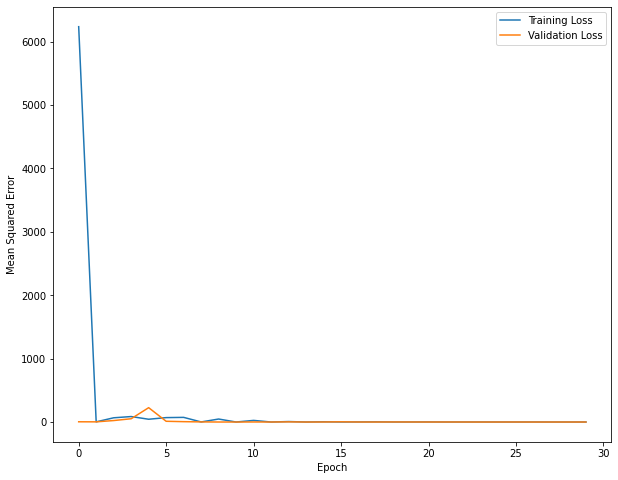

In [23]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"

# Establish the model's topography.
model_lr_cohesion = create_model_linear(learning_rate, my_new_feature_layer)

# Train the model on the normalized training set.
mse_train_lr_cohesion, mse_val_lr_cohesion = train_model(model_lr_cohesion, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_lr_cohesion, mse_val_lr_cohesion)

Using test data to get the estimation

In [24]:
test_data2 = test_data
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list
test_features_cohesion = {name:np.array(value) for name, value in test_data2.items()}

test_label_cohesion = np.array(test_features_cohesion.pop("cohesion"))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result_cohesion = model_lr_cohesion.evaluate(x=test_features_cohesion, y=test_label_cohesion, batch_size=batch_size)

for item in zip(model_lr_cohesion.metrics_names, result_cohesion):
  print (item[0], item[1])



 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 5ms/step - loss: 0.5432 - mean_squared_error: 0.5432 - accuracy: 0.0051
loss 0.543190062046051
mean_squared_error 0.543190062046051
accuracy 0.0051085567101836205


In [25]:
prediction_cohesion = model_lr_cohesion.predict(test_features_cohesion)
prediction_cohesion

25/25 [==============================] - 0s 3ms/step


array([[4.310013  ],
       [3.4821384 ],
       [2.708336  ],
       [3.6739066 ],
       [3.5435877 ],
       [3.8221598 ],
       [3.2621899 ],
       [3.53032   ],
       [3.4127808 ],
       [4.0623765 ],
       [3.4402118 ],
       [3.4770977 ],
       [3.5019324 ],
       [3.4143763 ],
       [3.7014532 ],
       [3.807831  ],
       [3.7908146 ],
       [4.210506  ],
       [2.3957403 ],
       [2.9953313 ],
       [6.3329015 ],
       [3.992249  ],
       [4.1386642 ],
       [3.7675486 ],
       [3.7647915 ],
       [3.6111066 ],
       [4.10657   ],
       [3.3236928 ],
       [3.827556  ],
       [3.334388  ],
       [2.9486074 ],
       [2.776396  ],
       [3.9000635 ],
       [4.455518  ],
       [3.5845947 ],
       [3.709329  ],
       [3.5851817 ],
       [3.9639394 ],
       [3.6320295 ],
       [2.1543527 ],
       [3.854756  ],
       [3.5197318 ],
       [3.6125033 ],
       [3.8975995 ],
       [3.1558185 ],
       [3.5706682 ],
       [3.6468108 ],
       [3.808

In [26]:
pre_list_cohesion = []
for value in prediction_cohesion:
  pre_list_cohesion.append(value[0])

Calculate accuracy for cohesion using vocabulary

In [27]:
cohesion_accuracy = accuracy_range(pre_list_cohesion, list(test_data['cohesion']))
cohesion_accuracy

0.4878671775223499

In [28]:
pre_list_2_cohesion = result(pre_list_cohesion)

In [29]:
val_accuracy_2_cohesion = accuracy(list(test_data['cohesion']), pre_list_2_cohesion)
val_accuracy_2_cohesion

0.22860791826309068

Building deep model

In [30]:
def create_model_deep(my_learning_rate, my_feature_layer, layers=[20, 12]):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the hidden layers
  for index, layer in enumerate(layers):
    model.add(tf.keras.layers.Dense(units=layer, 
                                    activation='relu', 
                                    name=f'Hidden{index}'))
  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1, name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError(), 'accuracy'])
  return model

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 9s - loss: 1315.3337 - mean_squared_error: 1315.3337 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 72ms/step - loss: 269.3230 - mean_squared_error: 269.3230 - accuracy: 0.0000e+00 - val_loss: 113.0506 - val_mean_squared_error: 113.0506 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 11ms/step - loss: 41.9386 - mean_squared_error: 41.9386 - accuracy: 0.0000e+00 - val_loss: 9.9882 - val_mean_squared_error: 9.9882 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 11.5165 - mean_squared_error: 11.5165 - accuracy: 0.0000e+00 - val_loss: 4.2458 - val_mean_squared_error: 4.2458 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 4.8538 - mean_squared_error: 4.8538 - accuracy: 0.0000e+00 - val_loss: 4.2318 - val_mean_squared_error: 4.2318 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 2.5977 - mean_squared_error: 2.5977 - accuracy: 0.0000e+00 - val_loss: 3.0432 - va

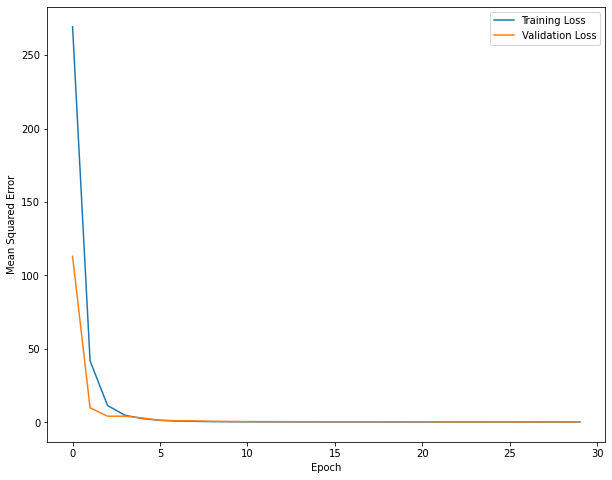

In [31]:
learning_rate = 0.01

# Specify the label
label_name = "vocabulary"

# Establish the model's topography.
model_deep = create_model_deep(learning_rate, my_feature_layer, [30, 12])
# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.

number_epochs = 30

mse_train_deep, mse_val_deep = train_model(model_deep, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep, mse_val_deep)

In [34]:

test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("cohesion")
test_label = np.array(test_features.pop(label_name))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result_deep = model_deep.evaluate(x=test_features, y=test_label, batch_size=batch_size)

for item in zip(model_deep.metrics_names, result_deep):
  print (item[0], item[1])



 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 4ms/step - loss: 0.4032 - mean_squared_error: 0.4032 - accuracy: 0.0000e+00
loss 0.403239905834198
mean_squared_error 0.403239905834198
accuracy 0.0


In [35]:
prediction_deep = model_deep.predict(test_features)
prediction_deep

25/25 [==============================] - 0s 3ms/step


array([[3.820089 ],
       [2.9559553],
       [2.8183086],
       [3.3500142],
       [3.1544063],
       [3.3771355],
       [2.8718116],
       [3.1371157],
       [3.0004575],
       [3.9159105],
       [3.2918644],
       [3.1445327],
       [3.0709002],
       [3.353635 ],
       [3.2265475],
       [3.3175318],
       [3.2880652],
       [3.7883303],
       [2.7932084],
       [2.453238 ],
       [5.7279234],
       [3.48124  ],
       [3.6702316],
       [3.3859928],
       [3.374199 ],
       [3.107713 ],
       [3.7190578],
       [3.125624 ],
       [3.5779445],
       [3.1080616],
       [2.9199197],
       [2.8714516],
       [3.486142 ],
       [4.0191216],
       [3.285134 ],
       [3.4301765],
       [3.0654762],
       [3.8711498],
       [3.433953 ],
       [2.7388732],
       [3.4322813],
       [3.0438182],
       [3.2329366],
       [3.5376737],
       [2.636893 ],
       [3.2575233],
       [3.1713521],
       [3.3907316],
       [3.3097415],
       [3.071027 ],


In [36]:
pre_list_deep = []
for value in prediction_deep:
  pre_list_deep.append(value[0])

Calculate accuracy for vocabulary

In [37]:
vocabulary_accuracy_deep = accuracy_range(pre_list_deep, list(test_data['vocabulary']))
vocabulary_accuracy_deep

0.3793103448275862

In [38]:
pre_list_2_deep = result(pre_list_deep)

In [39]:
val_accuracy_2_deep = accuracy(list(test_data['vocabulary']), pre_list_2_deep)
val_accuracy_2_deep

0.0

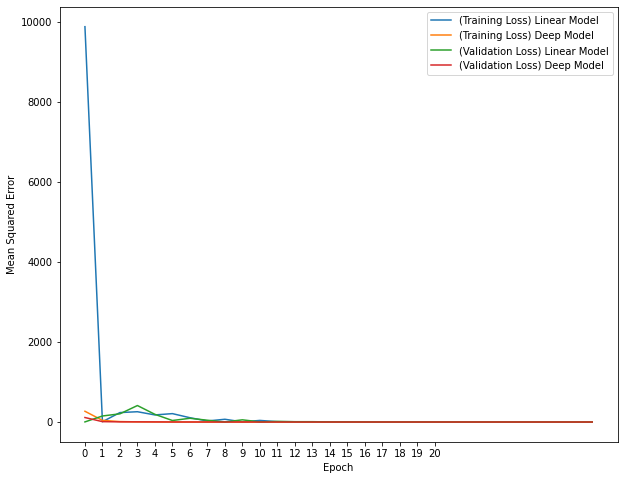

In [40]:
plt.figure(figsize=(10, 8))
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(mse_train_lr, label="(Training Loss) Linear Model")
plt.plot(mse_train_deep, label="(Training Loss) Deep Model")
plt.plot(mse_val_lr, label="(Validation Loss) Linear Model")
plt.plot(mse_val_deep, label="(Validation Loss) Deep Model")
plt.legend()
# plt.ylim([mse.min()*0.95, mse.max() * 1.03])
plt.xticks(range(21))
plt.show() 

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 9s - loss: 2662.4355 - mean_squared_error: 2662.4355 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 74ms/step - loss: 537.2078 - mean_squared_error: 537.2078 - accuracy: 3.9968e-04 - val_loss: 67.9351 - val_mean_squared_error: 67.9351 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 84.3202 - mean_squared_error: 84.3202 - accuracy: 7.9936e-04 - val_loss: 68.7865 - val_mean_squared_error: 68.7865 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 30.6396 - mean_squared_error: 30.6396 - accuracy: 0.0016 - val_loss: 21.2517 - val_mean_squared_error: 21.2517 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 10.7460 - mean_squared_error: 10.7460 - accuracy: 0.0012 - val_loss: 5.7383 - val_mean_squared_error: 5.7383 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 4.7967 - mean_squared_error: 4.7967 - accuracy: 0.0016 - val_loss: 2.2368 - val_mean_squar

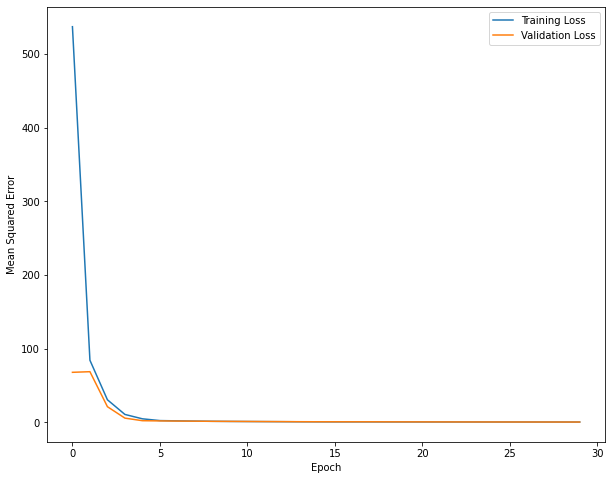

In [41]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"

# Establish the model's topography.
model_deep_cohesion = create_model_deep(learning_rate, my_new_feature_layer)

# Train the model on the normalized training set.
mse_train_deep_cohesion, mse_val_deep_cohesion = train_model(model_deep_cohesion, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep_cohesion, mse_val_deep_cohesion)

In [42]:
test_data2 = test_data
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list_deep
test_features_deep_cohesion = {name:np.array(value) for name, value in test_data2.items()}

test_label_deep_cohesion = np.array(test_features_deep_cohesion.pop("cohesion"))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result_deep_cohesion = model_deep_cohesion.evaluate(x=test_features_deep_cohesion, y=test_label_deep_cohesion, batch_size=batch_size)

for item in zip(model_deep_cohesion.metrics_names, result_deep_cohesion):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 4ms/step - loss: 0.4314 - mean_squared_error: 0.4314 - accuracy: 0.0051
loss 0.43143004179000854
mean_squared_error 0.43143004179000854
accuracy 0.0051085567101836205


In [114]:
len(test_features_deep_cohesion)

36

In [43]:
prediction_deep_cohesion = model_deep_cohesion.predict(test_features_deep_cohesion)
pre_list_deep_cohesion = []
for value in prediction_deep_cohesion:
  pre_list_deep_cohesion.append(value[0])

25/25 [==============================] - 0s 3ms/step


In [44]:
cohesion_deep_accuracy = accuracy_range(pre_list_deep_cohesion, list(test_data['cohesion']))
cohesion_deep_accuracy

0.5427841634738186

In [50]:
import pickle
pickle.dump(model_deep, open('nn_model_vocabulary.sav', 'wb'))
pickle.dump(model_deep_cohesion, open('nn_model_cohesion.sav', 'wb'))

In [51]:
nn_model_vocabulary = pickle.load(open("nn_model_vocabulary.sav", 'rb'))
nn_model_cohesion = pickle.load(open("nn_model_cohesion.sav", 'rb'))